In [245]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# Loading data set

In [246]:
og_df = pd.read_csv("heart.csv")
og_df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [247]:
og_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [248]:
og_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [249]:
og_df.shape

(918, 12)

In [250]:
og_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [251]:
og_df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [252]:
og_df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [253]:
og_df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [254]:
og_df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

<Axes: >

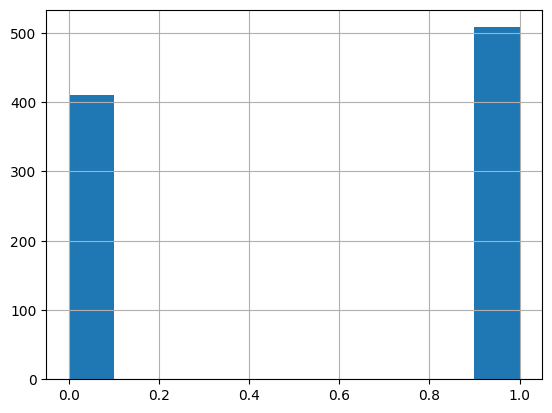

In [255]:
og_df['HeartDisease'].hist()
# there is a imbalance in the target column
# first evaluate the model on the without applying under sampling or oversampling and then with these techniques applied.

# Preprocessing data(encoding)

In [256]:
from sklearn.preprocessing import OneHotEncoder

In [257]:
ohe = OneHotEncoder()
encode = ohe.fit_transform(og_df[['Sex', 'ExerciseAngina']]).astype(int)
encoded1 = pd.DataFrame(encode.toarray(), columns=ohe.get_feature_names_out(('Sex', 'ExerciseAngina')))


In [258]:
encoded1

,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,0,1,1,0
1,1,0,1,0
2,0,1,1,0
3,1,0,0,1
4,0,1,1,0
...,...,...,...,...
913,0,1,1,0
914,0,1,1,0
915,0,1,0,1
916,1,0,1,0


# dropping a column to avoid multicollinearity

In [259]:
encoded1.drop(columns=['Sex_F', 'ExerciseAngina_N'], inplace=True)

In [260]:
encoded1

,Sex_M,ExerciseAngina_Y
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,1,1
916,0,0


In [261]:
first_encoded_columns = encoded1

In [262]:
first_encoded_columns

,Sex_M,ExerciseAngina_Y
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,1,1
916,0,0


In [263]:
og_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [264]:
# did some search to see if there is any inherent order between the categorcial values in restingecg
# column same with stslope column after searching came to a conclusion to treat them as nominal catagories.

In [265]:
encode2 = ohe.fit_transform(og_df[['RestingECG', 'ST_Slope']]).astype(int)
encoded3 = pd.DataFrame(encode2.toarray(), columns=ohe.get_feature_names_out(('RestingECG', 'ST_Slope')))

In [266]:
encoded3

,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,0,1,0
4,0,1,0,0,0,1
...,...,...,...,...,...,...
913,0,1,0,0,1,0
914,0,1,0,0,1,0
915,0,1,0,0,1,0
916,1,0,0,0,1,0


In [267]:
encoded3.drop(columns=['RestingECG_LVH', 'ST_Slope_Down'], inplace=True)

In [268]:
encoded3

,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,1,0,0,1
1,1,0,1,0
2,0,1,0,1
3,1,0,1,0
4,1,0,0,1
...,...,...,...,...
913,1,0,1,0
914,1,0,1,0
915,1,0,1,0
916,0,0,1,0


In [269]:
second_encoded_columns = encoded3

In [270]:
second_encoded_columns

,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,1,0,0,1
1,1,0,1,0
2,0,1,0,1
3,1,0,1,0
4,1,0,0,1
...,...,...,...,...
913,1,0,1,0
914,1,0,1,0
915,1,0,1,0
916,0,0,1,0


In [271]:
# did some searches didnt got much info wheather the categories in chestpaintype column has any inherent order between
# them so decided to use one hot encoding

In [272]:
encode5 = ohe.fit_transform(og_df[['ChestPainType']]).astype(int)
encoded6 = pd.DataFrame(encode5.toarray(), columns=ohe.get_feature_names_out(['ChestPainType']))

In [273]:
encoded6

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [274]:
encoded6.drop(columns='ChestPainType_ASY', inplace=True)

In [275]:
third_encoded_columns = encoded6

In [276]:
third_encoded_columns

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0
...,...,...,...
913,0,0,1
914,0,0,0
915,0,0,0
916,1,0,0


# concating encoded columns wtih the original dataframe

In [277]:
final_df = pd.concat([first_encoded_columns, second_encoded_columns, third_encoded_columns, og_df], axis=1)
final_df

,Sex_M,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Age,...,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,0,1,0,0,1,1,0,0,40,...,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,0,0,1,0,1,0,0,1,0,49,...,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,0,1,0,1,1,0,0,37,...,ATA,130,283,0,ST,98,N,0.0,Up,0
3,0,1,1,0,1,0,0,0,0,48,...,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,1,0,1,0,0,1,0,1,0,54,...,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,1,0,1,0,0,0,1,45,...,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,1,0,1,0,1,0,0,0,0,68,...,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,1,1,1,0,1,0,0,0,0,57,...,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,0,0,0,0,1,0,1,0,0,57,...,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [278]:
final_df.drop(columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'], axis=1, inplace=True)

In [279]:
og_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [280]:
final_df.rename(columns={'Sex_M': 'Sex'}, inplace=True)

In [281]:
final_df

,Sex,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,0,1,0,0,1,1,0,0,40,140,289,0,172,0.0,0
1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0,1
2,1,0,0,1,0,1,1,0,0,37,130,283,0,98,0.0,0
3,0,1,1,0,1,0,0,0,0,48,138,214,0,108,1.5,1
4,1,0,1,0,0,1,0,1,0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,1,0,1,0,0,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,0,0,0,0,68,144,193,1,141,3.4,1
915,1,1,1,0,1,0,0,0,0,57,130,131,0,115,1.2,1
916,0,0,0,0,1,0,1,0,0,57,130,236,0,174,0.0,1


In [282]:
final_df.columns

Index(['Sex', 'ExerciseAngina_Y', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'Age', 'RestingBP',
       'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'],
      dtype='object')

In [283]:
copy_final_df = final_df

In [284]:
copy_final_df

,Sex,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,0,1,0,0,1,1,0,0,40,140,289,0,172,0.0,0
1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0,1
2,1,0,0,1,0,1,1,0,0,37,130,283,0,98,0.0,0
3,0,1,1,0,1,0,0,0,0,48,138,214,0,108,1.5,1
4,1,0,1,0,0,1,0,1,0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,1,0,1,0,0,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,0,0,0,0,68,144,193,1,141,3.4,1
915,1,1,1,0,1,0,0,0,0,57,130,131,0,115,1.2,1
916,0,0,0,0,1,0,1,0,0,57,130,236,0,174,0.0,1


# spitting data into traning, validation and test sets

In [285]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [286]:
X = copy_final_df.drop(columns=['HeartDisease'])
y = copy_final_df['HeartDisease']

In [287]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.15/0.85), random_state=42) 

In [288]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (642, 15) (642,)
Validation set shape: (138, 15) (138,)
Test set shape: (138, 15) (138,)


# Using logistic regression model 

In [289]:
log_reg = LogisticRegression(random_state=42)

In [290]:
logistic_params = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'saga'],  
    'max_iter': [100, 200, 300],  
    'class_weight': [None, 'balanced']  
}

In [291]:
rndm_srch_log_reg = RandomizedSearchCV(estimator=log_reg, param_distributions=logistic_params, cv=5, n_jobs=-1)
rndm_srch_log_reg.fit(X_train, y_train)

f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\New folder\ml a

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']})

In [292]:
# getting the best model on the validation set
best_model_log_reg = rndm_srch_log_reg.best_estimator_

In [293]:
# validating the best model on validation set
y_val_pred = best_model_log_reg.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

In [294]:
print(val_accuracy)
print(val_precision)
print(val_recall)
print(val_f1)

0.8985507246376812
0.8695652173913043
0.9230769230769231
0.8955223880597015


# Evaluating the best model on test set

In [295]:
y_test_pred = best_model_log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [296]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1)

0.8478260869565217
0.9066666666666666
0.8292682926829268
0.8662420382165605


# Using random forest classifier

In [297]:
rf_model = RandomForestClassifier(random_state=42)

In [298]:
rf_params = {
    'n_estimators': [100, 200, 300], 
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]  
}

In [299]:
rndm_srch_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, cv=5, n_jobs=-1)
rndm_srch_rf.fit(X_train, y_train)

f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\base.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [300]:
# getting the best model
best_model_rf = rndm_srch_rf.best_estimator_

In [301]:
# validating the best model on validation set
y_val_pred = best_model_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

In [302]:
print(val_accuracy)
print(val_precision)
print(val_recall)
print(val_f1)

0.8913043478260869
0.8472222222222222
0.9384615384615385
0.8905109489051095


In [303]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        73
           1       0.85      0.94      0.89        65

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.90      0.89      0.89       138



In [304]:
# validating the best model on test set
y_test_pred = best_model_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [305]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1)

0.855072463768116
0.8780487804878049
0.8780487804878049
0.8780487804878049


In [306]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        56
           1       0.88      0.88      0.88        82

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



# created a function to avoid repeating code

In [307]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Using decision tree classifier

In [308]:
dcs_tree = DecisionTreeClassifier(random_state=42)

In [309]:
tree_params = {
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],    
    'max_depth': [None, 5, 10, 20],     
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4],      
    'max_features': [None, 'sqrt', 'log2']  
}

In [310]:
rand_sch_dcs_tree = RandomizedSearchCV(estimator=dcs_tree, param_distributions=tree_params, cv=5, n_jobs=-1)
rand_sch_dcs_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [311]:
# getting the best model
best_model_dcs_tree = rand_sch_dcs_tree.best_estimator_

In [312]:
# validating the best model on the validation set
y_val_pred = best_model_dcs_tree.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.855072463768116
Precision: 0.8260869565217391
Recall: 0.8769230769230769
F1 Score: 0.8507462686567164


In [313]:
# testing the best model on the test set
y_test_pred = best_model_dcs_tree.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8695652173913043
Precision: 0.8902439024390244
Recall: 0.8902439024390244
F1 Score: 0.8902439024390244


# Using support vector machine

In [314]:
svc_model = SVC(random_state=42)

In [315]:
svc_params = {
    'C': [0.1, 1, 10],           
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4]          
}

In [316]:
rndm_srch_svc = RandomizedSearchCV(estimator=svc_model, param_distributions=svc_params, cv=5, n_jobs=-1)
rndm_srch_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [317]:
# best model
best_model_svc = rndm_srch_svc.best_estimator_

In [318]:
# validating the model on validation set
y_val_pred = best_model_svc.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8913043478260869
Precision: 0.8571428571428571
Recall: 0.9230769230769231
F1 Score: 0.8888888888888888


In [319]:
# evaluating the model on test set
y_test_pred = best_model_svc.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.855072463768116
Precision: 0.8780487804878049
Recall: 0.8780487804878049
F1 Score: 0.8780487804878049


# From the above the best models are logistic regression and support vector classifier

# Training the models with handled imbalance

In [320]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (642, 15) (642,)
Validation set shape: (138, 15) (138,)
Test set shape: (138, 15) (138,)


# Using SMOTE to handle imbalance in the target column resampling on training set to not cause data leakage

In [321]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [322]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [323]:
copy_final_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [324]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (642, 15) (642,)
Validation set shape: (138, 15) (138,)
Test set shape: (138, 15) (138,)


In [325]:
X_train_resampled.shape

(722, 15)

In [326]:
X_train.shape

(642, 15)

In [327]:
test = pd.concat([X_train_resampled, y_train_resampled], axis=1)
test['HeartDisease'].value_counts()

HeartDisease
1    361
0    361
Name: count, dtype: int64

In [328]:
copy_final_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# using logistic regression model

In [329]:
rndm_srch_log_reg_1 = RandomizedSearchCV(estimator=log_reg, param_distributions=logistic_params, cv=5, n_jobs=-1)
rndm_srch_log_reg_1.fit(X_train_resampled, y_train_resampled)

f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\New folder\ml and

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']})

In [330]:
best_model_log_reg_1 = rndm_srch_log_reg_1.best_estimator_

In [331]:
y_val_pred = best_model_log_reg_1.predict(X_val)

In [332]:
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8985507246376812
Precision: 0.8695652173913043
Recall: 0.9230769230769231
F1 Score: 0.8955223880597015


In [333]:
y_test_pred = best_model_log_reg_1.predict(X_test)

In [334]:
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8478260869565217
Precision: 0.8860759493670886
Recall: 0.8536585365853658
F1 Score: 0.8695652173913043


# using random forest model

In [335]:
rndm_srch_rf_1 = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, cv=5, n_jobs=-1)
rndm_srch_rf_1.fit(X_train_resampled, y_train_resampled)

f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "f:\New folder\ml and ds project\project learning\virenv\Lib\site-packages\sklearn\bas

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [336]:
best_model_rf_1 = rndm_srch_rf_1.best_estimator_

In [337]:
y_val_pred = best_model_rf_1.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8985507246376812
Precision: 0.8805970149253731
Recall: 0.9076923076923077
F1 Score: 0.8939393939393939


In [338]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        73
           1       0.88      0.91      0.89        65

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



In [339]:
y_test_pred = best_model_rf_1.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8695652173913043
Precision: 0.9
Recall: 0.8780487804878049
F1 Score: 0.8888888888888888


In [340]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        56
           1       0.90      0.88      0.89        82

    accuracy                           0.87       138
   macro avg       0.86      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



# using decision tree classifier

In [341]:
rand_sch_dcs_tree_1 = RandomizedSearchCV(estimator=dcs_tree, param_distributions=tree_params, cv=5, n_jobs=-1)
rand_sch_dcs_tree_1.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [342]:
best_model_dcs_tree_1 = rand_sch_dcs_tree_1.best_estimator_

In [343]:
y_val_pred = best_model_dcs_tree_1.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8405797101449275
Precision: 0.8307692307692308
Recall: 0.8307692307692308
F1 Score: 0.8307692307692308


In [344]:
y_test_pred = best_model_dcs_tree_1.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8478260869565217
Precision: 0.8860759493670886
Recall: 0.8536585365853658
F1 Score: 0.8695652173913043


# using support vector machine

In [345]:
rndm_srch_svc_1 = RandomizedSearchCV(estimator=svc_model, param_distributions=svc_params, cv=5, n_jobs=-1)
rndm_srch_svc_1.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [346]:
best_model_svc_1 = rndm_srch_svc_1.best_estimator_

In [347]:
y_val_pred = best_model_svc_1.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.9130434782608695
Precision: 0.8840579710144928
Recall: 0.9384615384615385
F1 Score: 0.9104477611940298


In [348]:
y_test_pred = best_model_svc_1.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8478260869565217
Precision: 0.8765432098765432
Recall: 0.8658536585365854
F1 Score: 0.8711656441717791


# Using CATBOOST model on without resampled training sets

In [349]:
from catboost import CatBoostClassifier

In [350]:
catboost_model = CatBoostClassifier()

In [351]:
catboost_params = {
    'iterations': [100, 500, 1000],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'depth': [4, 6, 8],  
    'loss_function': ['Logloss', 'CrossEntropy'], 
    'l2_leaf_reg': [1, 3, 5]  
}

In [352]:
rand_sch_catbst = RandomizedSearchCV(estimator=catboost_model, param_distributions=catboost_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rand_sch_catbst.fit(X_train, y_train)

0:	learn: 0.6831689	total: 7.21ms	remaining: 7.21s
1:	learn: 0.6728119	total: 22.2ms	remaining: 11.1s
2:	learn: 0.6628304	total: 38.5ms	remaining: 12.8s
3:	learn: 0.6529880	total: 53.9ms	remaining: 13.4s
4:	learn: 0.6429950	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6354968	total: 69.6ms	remaining: 11.5s
6:	learn: 0.6287022	total: 85.1ms	remaining: 12.1s
7:	learn: 0.6202489	total: 101ms	remaining: 12.5s
8:	learn: 0.6129301	total: 116ms	remaining: 12.8s
9:	learn: 0.6061320	total: 131ms	remaining: 13s
10:	learn: 0.6002384	total: 152ms	remaining: 13.7s
11:	learn: 0.5920200	total: 169ms	remaining: 14s
12:	learn: 0.5840096	total: 179ms	remaining: 13.6s
13:	learn: 0.5762213	total: 193ms	remaining: 13.6s
14:	learn: 0.5681506	total: 209ms	remaining: 13.7s
15:	learn: 0.5616682	total: 225ms	remaining: 13.8s
16:	learn: 0.5544132	total: 240ms	remaining: 13.9s
17:	learn: 0.5471980	total: 256ms	remaining: 14s
18:	learn: 0.5413672	total: 272ms	remaining: 14s
19:	learn: 0.5344736	total: 288ms	remainin

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000026D2FAFB7D0>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 500, 1000],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'loss_function': ['Logloss',
                                                          'CrossEntropy']},
                   random_state=42)

In [353]:
best_catboost_model = rand_sch_catbst.best_estimator_

In [354]:
y_val_pred = best_catboost_model.predict(X_val)

In [355]:
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8840579710144928
Precision: 0.8356164383561644
Recall: 0.9384615384615385
F1 Score: 0.8840579710144928


In [356]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88        73
           1       0.84      0.94      0.88        65

    accuracy                           0.88       138
   macro avg       0.89      0.89      0.88       138
weighted avg       0.89      0.88      0.88       138



In [357]:
y_test_pred = best_catboost_model.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8768115942028986
Precision: 0.8823529411764706
Recall: 0.9146341463414634
F1 Score: 0.8982035928143712


In [358]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        56
           1       0.88      0.91      0.90        82

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



# training with resampled train sets

In [359]:
rand_sch_catbst_1 = RandomizedSearchCV(estimator=catboost_model, param_distributions=catboost_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rand_sch_catbst_1.fit(X_train_resampled, y_train_resampled)

0:	learn: 0.6821791	total: 11ms	remaining: 11s
1:	learn: 0.6713757	total: 13.9ms	remaining: 6.94s
2:	learn: 0.6611500	total: 16.7ms	remaining: 5.56s
3:	learn: 0.6523875	total: 19.3ms	remaining: 4.8s
4:	learn: 0.6419999	total: 21.7ms	remaining: 4.32s
5:	learn: 0.6313831	total: 24.1ms	remaining: 3.99s
6:	learn: 0.6233765	total: 26.5ms	remaining: 3.76s
7:	learn: 0.6141689	total: 29.6ms	remaining: 3.67s
8:	learn: 0.6066893	total: 32.4ms	remaining: 3.57s
9:	learn: 0.5995366	total: 34.9ms	remaining: 3.45s
10:	learn: 0.5934588	total: 36.2ms	remaining: 3.25s
11:	learn: 0.5847604	total: 38.5ms	remaining: 3.17s
12:	learn: 0.5765765	total: 41ms	remaining: 3.12s
13:	learn: 0.5680855	total: 43.8ms	remaining: 3.08s
14:	learn: 0.5599835	total: 46.2ms	remaining: 3.04s
15:	learn: 0.5526791	total: 48.5ms	remaining: 2.98s
16:	learn: 0.5447384	total: 50.9ms	remaining: 2.94s
17:	learn: 0.5369613	total: 53.4ms	remaining: 2.92s
18:	learn: 0.5291727	total: 56.1ms	remaining: 2.89s
19:	learn: 0.5223131	total: 5

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000026D2FAFB7D0>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 500, 1000],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'loss_function': ['Logloss',
                                                          'CrossEntropy']},
                   random_state=42)

In [360]:
best_catboost_model_1 = rand_sch_catbst_1.best_estimator_

In [361]:
y_val_pred = best_catboost_model_1.predict(X_val)
evaluate_model(y_val, y_val_pred)

Accuracy: 0.8840579710144928
Precision: 0.8450704225352113
Recall: 0.9230769230769231
F1 Score: 0.8823529411764706


In [362]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        73
           1       0.85      0.92      0.88        65

    accuracy                           0.88       138
   macro avg       0.89      0.89      0.88       138
weighted avg       0.89      0.88      0.88       138



In [363]:
y_test_pred = best_catboost_model_1.predict(X_test)
evaluate_model(y_test, y_test_pred)

Accuracy: 0.8405797101449275
Precision: 0.875
Recall: 0.8536585365853658
F1 Score: 0.8641975308641975


In [364]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        56
           1       0.88      0.85      0.86        82

    accuracy                           0.84       138
   macro avg       0.83      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



# saving random forest model trained using resampled training set 

In [369]:
from joblib import dump
dump(best_model_rf_1, 'heart disease classifier model.pk1')

['heart disease classifier model.pk1']